In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('netflix.csv')

In [46]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
data.shape

(8807, 12)

In [87]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Mostly all are in categorical in nature 

In [88]:
#Checking unqiue value 
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            15
duration         220
listed_in        514
description     8775
dtype: int64

In [49]:
#To check missing value
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Column director has highest number of missing values, followed by country , then cast.

<Axes: >

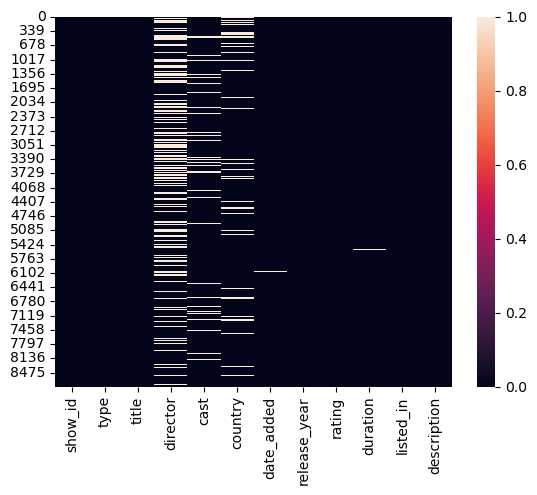

In [54]:
#To check Missing value through heatmap
sns.heatmap(data.isna())

In [90]:
#To find missing percentage 
for i in data.columns:
    null_rate = data[i].isna().mean() * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

rating null rate: 0.05%


In [57]:
# Frequent director occur
data['director'].mode()[0]

'Rajiv Chilaka'

In [59]:
# Handling Missing value --> replaced with mode 
data.fillna({'director':data['director'].mode()[0],'cast':data['cast'].mode()[0],'country':data['country'].mode()[0]},inplace=True)

In [84]:
data['director'].value_counts().head(10)

Rajiv Chilaka             2653
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Steven Spielberg            11
Name: director, dtype: int64

In [92]:
#Best day to release
# Extracting the day of the week from the 'date_added' column
data['Week_day'] = data['date_added'].dt.day_name()

# Counting the number of unique shows added on each day of the week
shows_per_day = data.groupby('Week_day')['show_id'].nunique()

# Finding the most popular day to release a movie/TV show on Netflix
launch_day = shows_per_day.idxmax()
launch_day_count = shows_per_day.max()

launch_day, launch_day_count, shows_per_day

('Friday',
 2498,
 Week_day
 Friday       2498
 Monday        851
 Saturday      826
 Sunday        751
 Thursday     1396
 Tuesday      1197
 Wednesday    1288
 Name: show_id, dtype: int64)

It's observed that , on friday most of the movies has launched so it could be popular day to release.

Text(0.5, 1.0, 'Top 10 director who gave highest number of content')

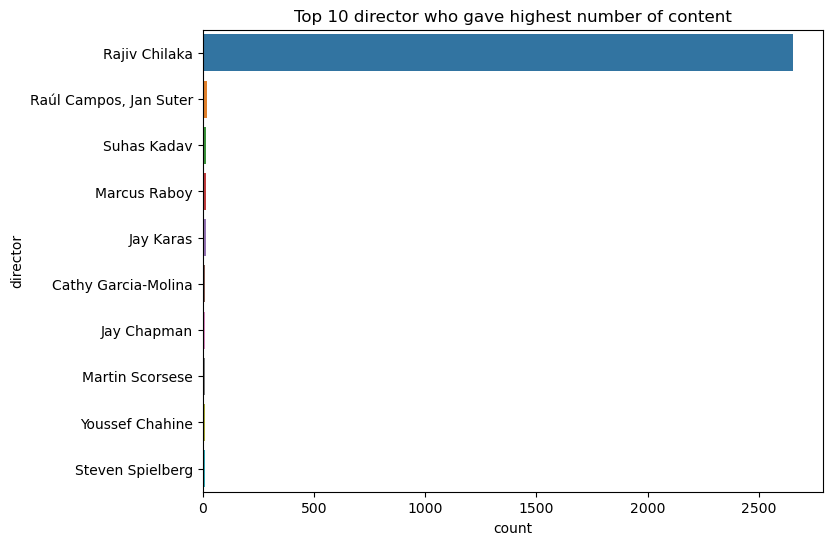

In [121]:

plt.figure(figsize=(8,6))
sns.countplot(y='director',order = data['director'].value_counts().index[0:10],data=data)
plt.title('Top 10 director who gave highest number of content')

In [62]:
#Also, change data type of date_added to date time.
data['date_added'] =pd.to_datetime(data['date_added'])
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [65]:
#To check where null value are coming for date_added
data[data['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Rajiv Chilaka,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Rajiv Chilaka,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Rajiv Chilaka,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Rajiv Chilaka,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Rajiv Chilaka,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Rajiv Chilaka,Igor Dmitriev,United States,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Rajiv Chilaka,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Rajiv Chilaka,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Rajiv Chilaka,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Rajiv Chilaka,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [66]:
#We will replace null values with recent most date for date_added.
recent_date = data['date_added'].max()
data.fillna({'date_added':recent_date},inplace=True)
data[data['show_id']== 's6067']

C:\Users\user\AppData\Local\Temp\ipykernel_11512\1026104304.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.fillna({'date_added':recent_date},inplace=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Rajiv Chilaka,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [67]:
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [68]:
#Shift rating values to dusration col where it is null
data.loc[data['director']== 'Louis C.K.' , 'duration'] = data['rating']
data[data['director']== 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [69]:
#Now replace rating value to other where director = Louis C.K.
data.loc[data['director']== 'Louis C.K.' , 'rating'] = 'Other'
data[data['director']== 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Other,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Other,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Other,66 min,Movies,The comic puts his trademark hilarious/thought...


Visualization

In [70]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [111]:
#Un-nesting
# Creating a function to un-nest a dataframe based on a specific column
def unnest(data, column):
    return (
        data.drop(column, axis=1)
        .join(
            data[column].str.split(',', expand=True)
            .stack()
            .reset_index(level=1, drop=True)
            .rename(column)
        )
    )

# Un-nesting the 'cast' column
unnested_cast = unnest(data, 'cast')
unnested_listed_in = unnest(data, 'listed_in')
unnested_listed_in

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Week_day,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Saturday,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Friday,International TV Shows
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Friday,TV Dramas
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Friday,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Friday,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Saturday,Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Saturday,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Saturday,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Saturday,International Movies


Text(0.5, 1.0, 'Movie vs Show count')

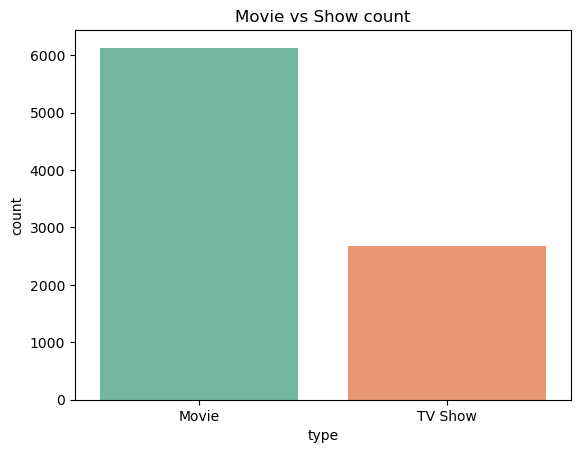

In [89]:
#to see count of types
sns.countplot(x='type',data=data,palette="Set2")
plt.title('Movie vs Show count')

It's observed that there are more number movies than shows on netflix.

In [114]:
df_movies=data[data["type"]=="Movie"]
df_tvshows=data[data["type"]=="TV Show"]
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Friday
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Friday
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Friday
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,Wednesday
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Wednesday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Saturday


In [115]:
#movies and tvshows that are released most based on the country
mc=df_movies.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
tc=df_tvshows.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
print(mc)
print(tc)

            country  title
525   United States   2498
218           India    893
440  United Kingdom    206
50           Canada    122
384           Spain     97
            country  title
160   United States   1151
140  United Kingdom    213
83            Japan    169
120     South Korea    158
66            India     79


Text(0.5, 1.0, 'Country wise content on netflix ')

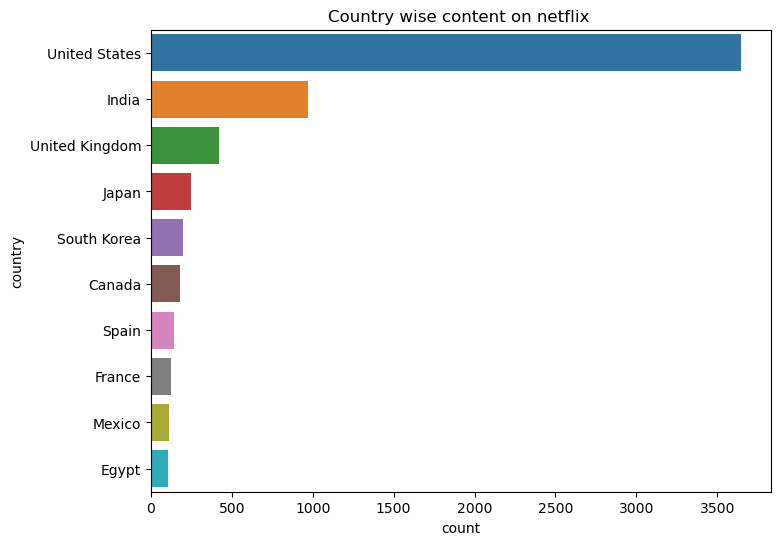

In [72]:
#COuntry wise analysis

plt.figure(figsize=(8,6))
sns.countplot(y='country',order = data['country'].value_counts().index[0:10],data=data)
plt.title('Country wise content on netflix ')

We can see United states produces a lot content on netflix.

Text(0.5, 1.0, 'Country wise content on netflix ')

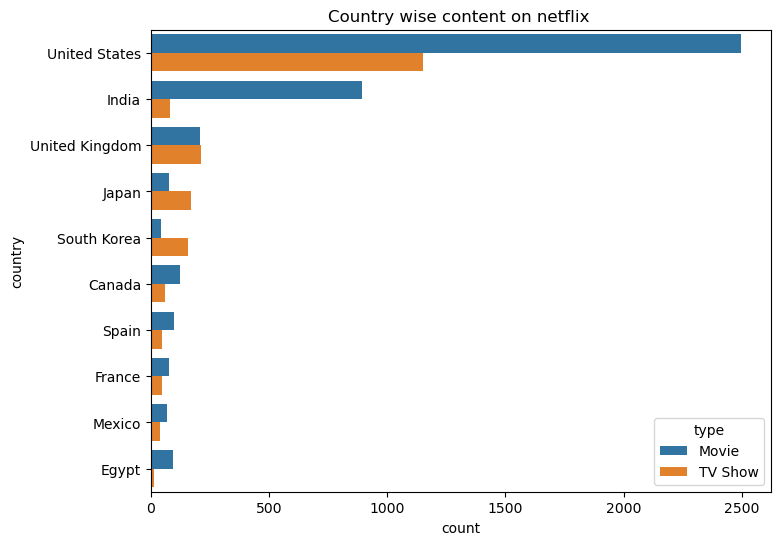

In [73]:
# We can see type wise drill down on country
plt.figure(figsize=(8,6))
sns.countplot(y='country',order = data['country'].value_counts().index[0:10],hue='type',data=data)
plt.title('Country wise content on netflix ')

In [74]:
# Let's check what are the major ratings given 
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Other          3
UR             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating of Shows vs count')

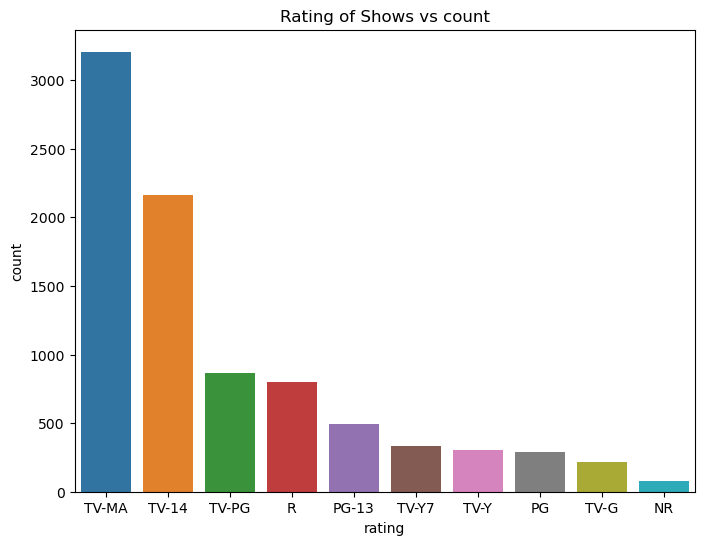

In [75]:
plt.figure(figsize = (8,6))
sns.countplot(x='rating',order =data['rating'].value_counts().index[0:10],data=data )
plt.title('Rating of Shows vs count')

It's obeserved that , Most of the shows has TV-MA and TV-14 ratings.

In [117]:
#cast who played the most in the movies and tvshows
df_cast_movies=df_movies.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)

df_cast_tvshows=df_tvshows.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)

print(df_cast_movies)
print(df_cast_tvshows)

                                                   cast  title
1202                                 David Attenborough    480
5188  Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...     13
4484                                        Samuel West     10
2246                                        Jeff Dunham      7
2799                                         Kevin Hart      6
...                                                 ...    ...
1835  Hailee Steinfeld, Woody Harrelson, Kyra Sedgwi...      1
1834  Hailee Steinfeld, Jessica Alba, Samuel L. Jack...      1
1833  Haifa Wehbe, Bassem Samra, Mohamed Lotfy, Ahme...      1
1832  Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...      1
5444  Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...      1

[5445 rows x 2 columns]
                                                   cast  title
505                                  David Attenborough    364
1493  Michela Luci, Jamie Watson, Anna Claire Bartla...      4
501                           

In [ ]:
# To check content realease in netflix 
plt.figure(figsize = (8,6))
sns.countplot(x='release_year',order=data['release_year'].value_counts().index[0:10],data=data )
plt.title('Release of Shows vs count')

Text(0.5, 1.0, 'Release of Shows vs count')

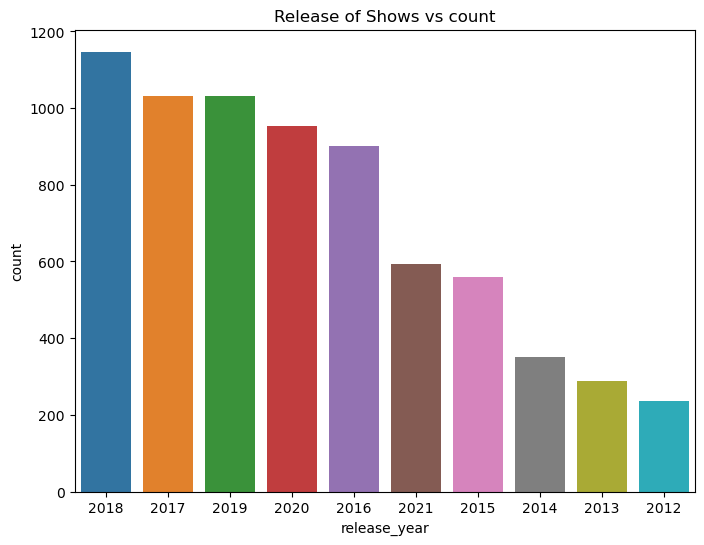

In [76]:
# To check content realease in netflix 
plt.figure(figsize = (8,6))
sns.countplot(x='release_year',order=data['release_year'].value_counts().index[0:10],data=data )
plt.title('Release of Shows vs count')

We an see that , In 2018, most number of movies has released .

In [77]:
#Popular Generes Analysis
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
data['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Text(0.5, 1.0, 'Top 10 genere on netflix')

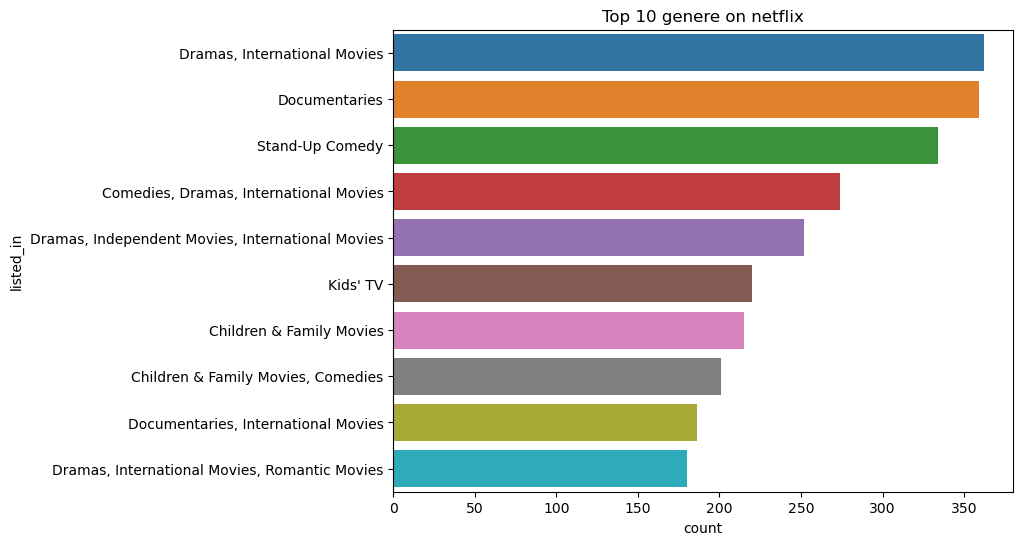

In [79]:
plt.figure(figsize = (8,6))
sns.countplot(y='listed_in',order=data['listed_in'].value_counts().index[0:10],data=data )
plt.title('Top 10 genere on netflix')

In [86]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Summary

+ Netflix has more movies than shows.
+ Most number of Movies and TV shows are produced by Unites states and followed by India
+ Friday is the day which most of the movies has launched so it could be popular day to release.
+ Rajiv Chilaka is the director who release highest number of movies/Shows on netflix
+ David Attenborough is casted most of the movies
+ Most of the content on netflix is for TV-MA
+ In 2018, Netflix has released alot movies as compared to other years.
+ Drams, International movies are most popular generes on netflix